In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
link_img = "..\\Image_Input\\conan.jpg"

In [3]:
def rotate_image(image, angle):
    # Chuyển đổi góc từ độ sang radian
    angle_rad = math.radians(angle)
    
    # Ma trận xoay
    rotation_matrix = np.array([
        [math.cos(angle_rad), -math.sin(angle_rad)],
        [math.sin(angle_rad), math.cos(angle_rad)]
    ])
    
    # Tìm kích thước của ảnh gốc
    rows = len(image)
    cols = len(image[0])
    
    # Tính toán kích thước của hình ảnh sau khi xoay
    new_rows = int(abs(rows * math.cos(angle_rad)) + abs(cols * math.sin(angle_rad)))
    new_cols = int(abs(rows * math.sin(angle_rad)) + abs(cols * math.cos(angle_rad)))
    
    # Tạo hình ảnh mới với kích thước tính toán được
    rotated_image = [[(0, 0, 0)] * new_cols for _ in range(new_rows)]
    
    # Tìm tọa độ tâm của hình ảnh gốc và hình ảnh mới
    cx_old = rows // 2
    cy_old = cols // 2
    cx_new = new_rows // 2
    cy_new = new_cols // 2
    
    # Áp dụng ma trận xoay cho từng điểm ảnh trong hình ảnh gốc
    for i in range(rows):
        for j in range(cols):
            # Tọa độ cũ
            x_old = i - cx_old
            y_old = j - cy_old
            
            # Tính tọa độ mới bằng np.dot với ma trận xoay
            [x_new, y_new] = np.dot(rotation_matrix, np.array([x_old, y_old]))
            
            # Điều chỉnh tọa độ mới về không gian tọa độ của hình ảnh mới
            x_new = int(x_new + cx_new)
            y_new = int(y_new + cy_new)
            
            # Kiểm tra nếu tọa độ mới nằm trong giới hạn của hình ảnh mới
            if 0 <= x_new < new_rows and 0 <= y_new < new_cols:
                rotated_image[x_new][y_new] = image[i][j]

    return rotated_image

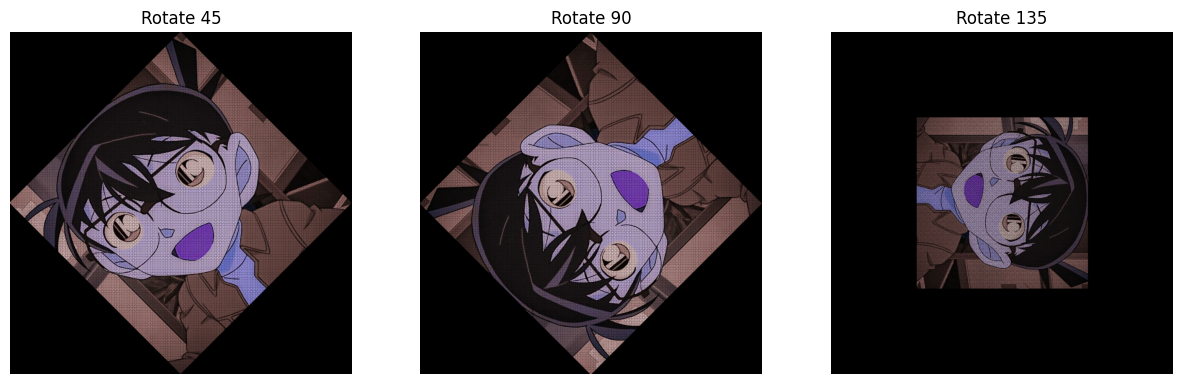

In [4]:
if __name__ == '__main__':
    img = cv2.imread(link_img)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    img = rotate_image(img, 45)
    plt.imshow(img)
    plt.title("Rotate 45")
    plt.axis('off')
    plt.subplot(1, 3, 2)
    img = rotate_image(img, 90)
    plt.imshow(img)
    plt.title("Rotate 90")
    plt.axis('off')
    plt.subplot(1, 3, 3)
    img = rotate_image(img, 135)
    plt.imshow(img)
    plt.title("Rotate 135")
    plt.axis('off')
    plt.show()